# 1 Intro

This notebook demonstrates how to create basic plots with Matplotlib's default style. In most cases, we apply none or minimal customization/refinement to showcase Matplotlib's basic functionalities.

In addition, we explore how to achieve the same plots using [Seaborn](https://seaborn.pydata.org/index.html), a high-level data visualization library built on Matplotlib. Seaborn excels at producing (reasonably) good-looking plots with minimal effort, so if you want to quickly create a basic plot that does not need extensive customization, Seaborn can sometimes be a good choice.

At the end of this notebook, we create an advanced plot, [bubble plot](https://en.wikipedia.org/wiki/Bubble_chart). This gives you a taste of how Matplotlib plots can be extensively customized.

The main reference for this notebook is this Matplotlib document [*Overview of Matplotlib Common Plots*](https://matplotlib.org/stable/plot_types/index.html).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2 Data

We will use the gapminder dataset (1952-2007) for all the plots. This dataset contains time series of development statistics for countries around world. The famous animated bubble plot of [World Health Chart](https://www.gapminder.org/fw/world-health-chart/) is based on this dataset. You can find a more comprehensive and updated gapminder dataset [here](https://www.gapminder.org/data/).

We first load the dataset and then take a quick look at it.

In [2]:
# load the data
data_url = "https://github.com/tdmdal/datasets-teaching/raw/main/gapminder/gapminder.csv"
gapminder = pd.read_csv(data_url)

In [3]:
# display first 5 rows
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [4]:
# check column types
gapminder.dtypes

,0
country,object
continent,object
year,int64
lifeExp,float64
pop,int64
gdpPercap,float64


In [5]:
# display summary statistics
gapminder.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [6]:
# display unique years
gapminder["year"].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [7]:
# display unique countries
gapminder["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

# 3 Basic Plots

## 3.1 Simple bar plot

We create a bar plot for population of Canada in 1997, 2002 and 2007.

In [8]:
# prepare data
gm_canada_after97 = gapminder[(gapminder["country"] == "Canada") & (gapminder["year"] >= 1997)]
gm_canada_after97.head()

,country,continent,year,lifeExp,pop,gdpPercap
249,Canada,Americas,1997,78.610,30305843,28954.92589
250,Canada,Americas,2002,79.770,31902268,33328.96507
251,Canada,Americas,2007,80.653,33390141,36319.23501


In [13]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=gm_canada_after97)

MessageError: Error: credential propagation was unsuccessful

### Matplotlib

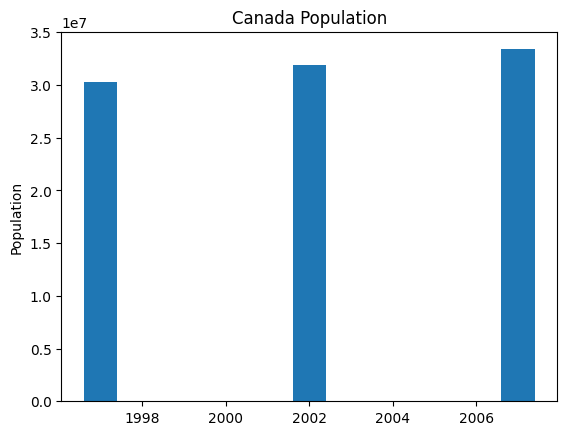

In [9]:
# matplotlib default
fig, ax = plt.subplots()

# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html
ax.bar(x=gm_canada_after97["year"], height=gm_canada_after97["pop"])

# set y label and plot title
ax.set_ylabel("Population")
ax.set_title("Canada Population")

# optional in notebook
plt.show()

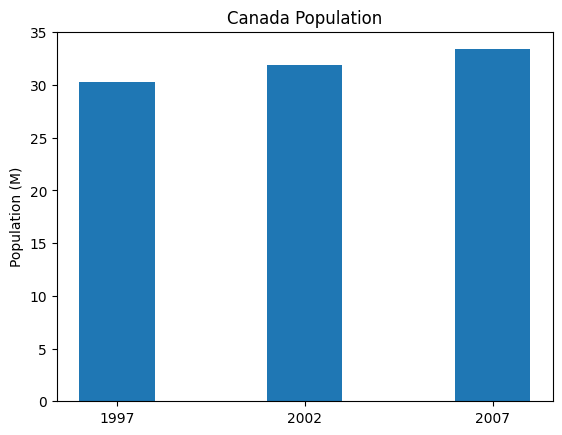

In [10]:
# matplotlib default + minor refinement
fig, ax = plt.subplots()

# convert population to M unit; specify bar width
ax.bar(x=gm_canada_after97["year"], height=gm_canada_after97["pop"]/1_000_000, width=2)

# set y label and plot title
ax.set_ylabel("Population (M)")
ax.set_title("Canada Population")

# specify xticks
xticks = [1997, 2002, 2007]
ax.set_xticks(xticks)

# optional in notebook
plt.show()

### Seaborn

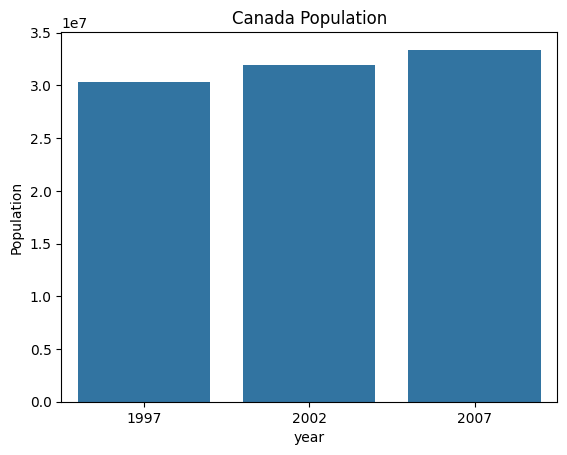

In [11]:
# seaborn default
# https://seaborn.pydata.org/generated/seaborn.barplot.html
ax = sns.barplot(x="year", y="pop", data=gm_canada_after97)
ax.set_ylabel("Population")
ax.set_title("Canada Population")

# optional in notebook
plt.show()

### Exercise

Create a bar plot for GDP per capita of Canada 1997, 2002 and 2007.

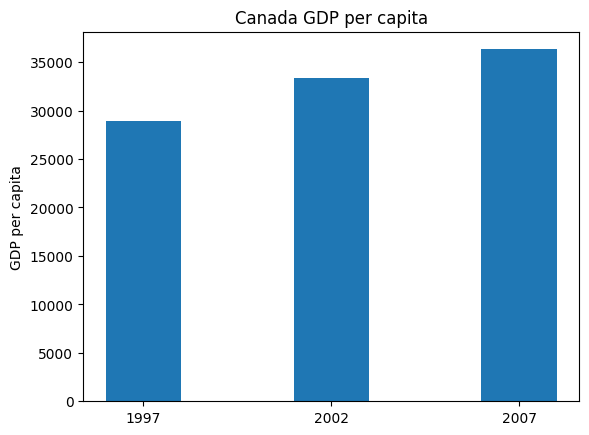

In [21]:
# your code here

fix, ax = plt.subplots()
ax.bar(x=gm_canada_after97["year"], height=gm_canada_after97["gdpPercap"], width=2)
ax.set_ylabel("GDP per capita")
ax.set_title("Canada GDP per capita")
xticks = [1997, 2002, 2007]
ax.set_xticks(xticks)
plt.show()

In [12]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## 3.2 Grouped bar plot

We create a grouped bar plot comparing GDP per capita between Canada and USA in 1997, 2002 and 2007.

In [22]:
# prepare data
gm_canada_us_after97 = gapminder[(gapminder["country"].isin(["Canada", "United States"])) & (gapminder["year"] >= 1997)]
gm_canada_us_after97.head()

,country,continent,year,lifeExp,pop,gdpPercap
249,Canada,Americas,1997,78.610,30305843,28954.92589
250,Canada,Americas,2002,79.770,31902268,33328.96507
251,Canada,Americas,2007,80.653,33390141,36319.23501
1617,United States,Americas,1997,76.810,272911760,35767.43303
1618,United States,Americas,2002,77.310,287675526,39097.09955


### Matplotlib

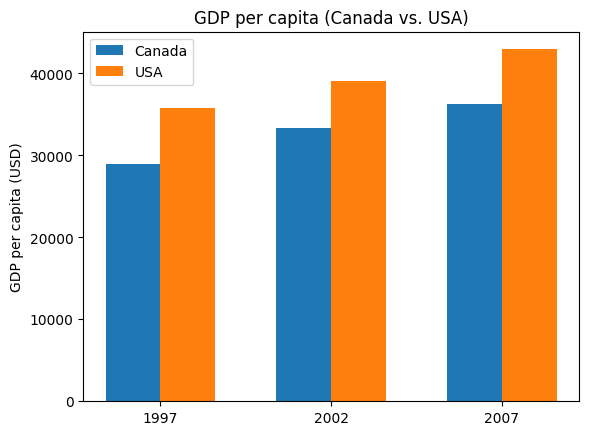

In [23]:
# matplotlib default + minor refinement

# further prepare data
can = gm_canada_us_after97[gm_canada_us_after97["country"]=="Canada"]
us = gm_canada_us_after97[gm_canada_us_after97["country"]=="United States"]

fig, ax = plt.subplots()

# define bar width and offset for grouped bar plot
bar_width = 1.6
offset = bar_width / 2

# plot 3 bars for Canada and then for USA
# Note that the starting x locations of the bars are calculated so that the bars
# for Canada and USA don't overlap
ax.bar(x=can["year"]-offset, height=can["gdpPercap"], width=bar_width, label="Canada")
ax.bar(x=us["year"]+offset, height=us["gdpPercap"], width=bar_width, label="USA")

# set y label and plot title
ax.set_ylabel("GDP per capita (USD)")
ax.set_title("GDP per capita (Canada vs. USA)")

# specify xticks
xticks = [1997, 2002, 2007]
ax.set_xticks(xticks)

# add legends based on bar labels
ax.legend(loc='upper left')

# optional in notebook
plt.show()

### Seanborn

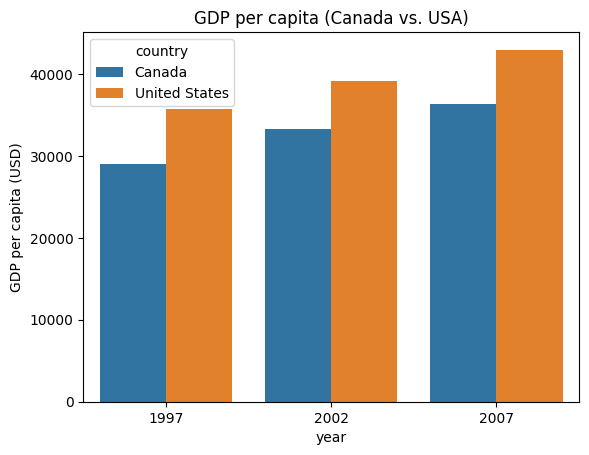

In [24]:
# https://seaborn.pydata.org/generated/seaborn.barplot.html
# note the hue argument
ax = sns.barplot(x="year", y="gdpPercap", hue="country", data=gm_canada_us_after97)
ax.set_ylabel("GDP per capita (USD)")
ax.set_title("GDP per capita (Canada vs. USA)")

# optional in notebook
plt.show()

### Pandas `DataFrame.plot.bar()`

In [25]:
# pivot the data frame to the right format before using DataFrame.plot.bar()
gm_plot = pd.pivot_table(gm_canada_us_after97, values='gdpPercap', index='year', columns=['country'])
gm_plot.head()

country,Canada,United States
year,,
1997,28954.92589,35767.43303
2002,33328.96507,39097.09955
2007,36319.23501,42951.65309


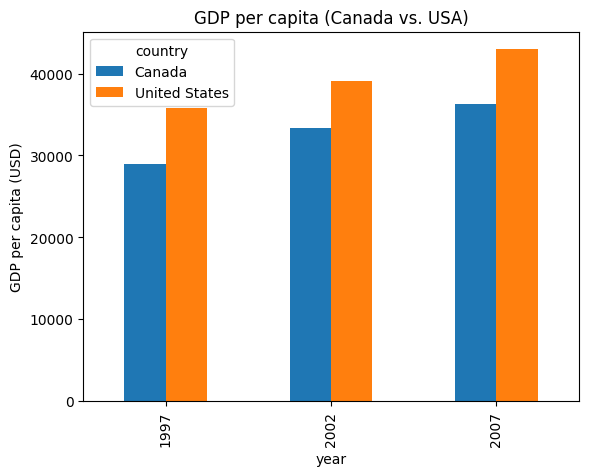

In [26]:
# grouped bar plot using pandas DataFrame.plot.bar()
ax = gm_plot.plot.bar()
ax.set_ylabel("GDP per capita (USD)")
ax.set_title("GDP per capita (Canada vs. USA)")

# optional in notebook
plt.show()

### Exercise

Create a grouped bar plot comparing GDP per capita of Canada, USA and Japan in 1997, 2002 and 2007.

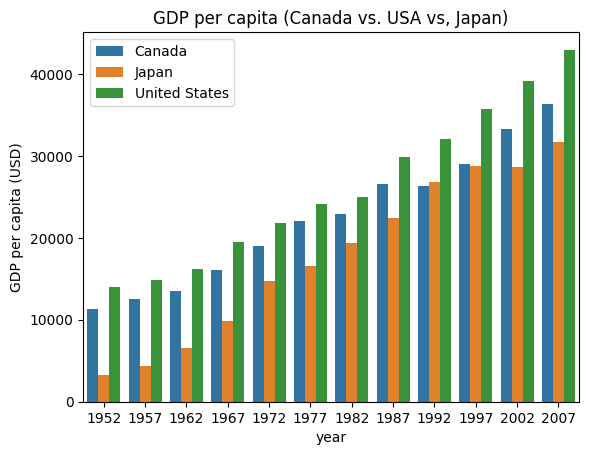

In [50]:
# your code here

gm_canada_us_jap_after97 = gapminder[gapminder["country"].isin(["United States","Canada","Japan"])]
ax = sns.barplot(x="year", y="gdpPercap", hue="country", data=gm_canada_us_jap_after97)
ax.set_ylabel("GDP per capita (USD)")
ax.set_title("GDP per capita (Canada vs. USA vs, Japan)")

ax.get_legend().set_title(None)

# optional in notebook
plt.show()

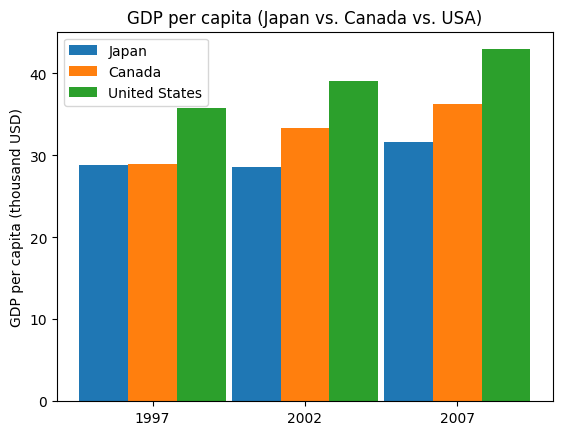

In [43]:
gm_jap_us_can_after97 = gapminder[(gapminder["country"].isin(["Japan","United States","Canada"])) & (gapminder["year"].isin([1997,2002,2007]))]
jan = gm_jap_us_can_after97[gm_jap_us_can_after97["country"]=="Japan"]
us = gm_jap_us_can_after97[gm_jap_us_can_after97["country"]=="United States"]
can = gm_jap_us_can_after97[gm_jap_us_can_after97["country"]=="Canada"]

fig,ax = plt.subplots()
bar_width = 1.6

ax.bar(x=jan["year"]-bar_width, height=jan["gdpPercap"]/1000, width=bar_width, label="Japan")
ax.bar(x=can["year"], height=can["gdpPercap"]/1000, width=bar_width, label="Canada")
ax.bar(x=us["year"]+bar_width, height=us["gdpPercap"]/1000, width=bar_width, label="United States")

ax.set_ylabel("GDP per capita (thousand USD)")
ax.set_title("GDP per capita (Japan vs. Canada vs. USA)")

# specify xticks
xticks = [1997, 2002, 2007]
ax.set_xticks(xticks)

# add legends based on bar labels
ax.legend(loc='upper left')

# optional in notebook
plt.show()

## 3.3 Line plot

Create a line plot for GDP per capita (Canada vs USA) from 1952 to 2007.

### Matplotlib

In [44]:
# prepare data
gm_canada = gapminder[gapminder["country"] == "Canada"]
gm_usa = gapminder[gapminder["country"] == "United States"]

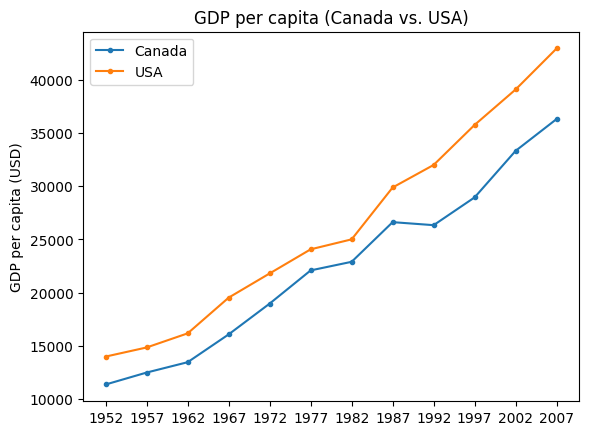

In [45]:
fig, ax = plt.subplots()

# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html
ax.plot(gm_canada["year"], gm_canada["gdpPercap"], marker=".", label="Canada")
ax.plot(gm_usa["year"], gm_usa["gdpPercap"], marker=".", label="USA")

# set y-axis label and plot title
ax.set_ylabel("GDP per capita (USD)")
ax.set_title("GDP per capita (Canada vs. USA)")

# specify xticks
xticks = list(range(1952, 2008, 5))
ax.set_xticks(xticks)

# add legends based on line labels
ax.legend(loc='upper left')

# optional in notebook
plt.show()

### Seaborn

In [46]:
# prepare data for seaborn plot
gm_canada_usa = gapminder[(gapminder["country"].isin(["Canada", "United States"]))]

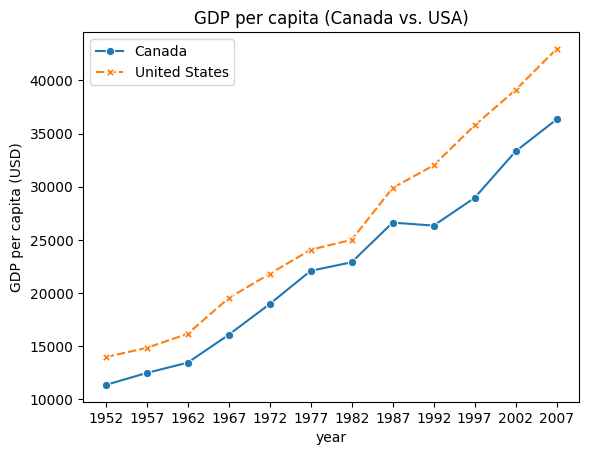

In [54]:
# https://seaborn.pydata.org/generated/seaborn.lineplot.html
ax = sns.lineplot(data=gm_canada_usa, x="year", y="gdpPercap",
                  hue="country", markers=True, style="country")

# specify xticks
xticks = list(range(1952, 2008, 5))
ax.set_xticks(xticks)

# set y-axis label and plot title
ax.set_ylabel("GDP per capita (USD)")
ax.set_title("GDP per capita (Canada vs. USA)")

# remove the default legend title
ax.get_legend().set_title(None)

# optional in notebook
plt.show()

### Exercise

Create a line plot of life expectancy (Canada vs USA) from 1952 to 2007.

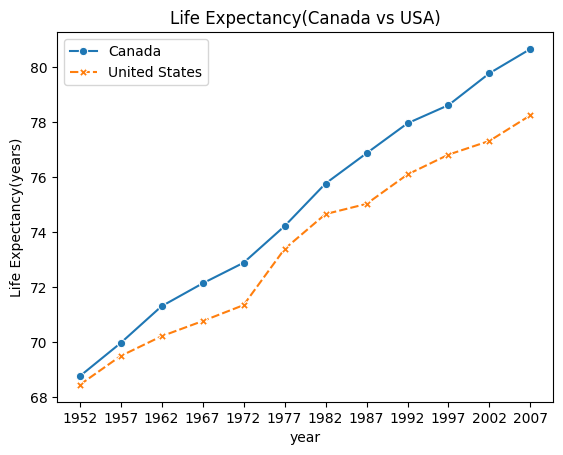

In [56]:
# your code here
ax = sns.lineplot(data = gm_canada_usa, x=gm_canada_usa["year"], y=gm_canada_usa["lifeExp"],hue="country", markers=True, style="country")

xticks = list(range(1952, 2008, 5))
ax.set_xticks(xticks)

ax.set_ylabel("Life Expectancy(years)")
ax.set_title("Life Expectancy(Canada vs USA)")

ax.get_legend().set_title(None)

plt.show()


## 3.4 Histogram

Plot histograms for life expectancy across countries in 1952 and 2007.

### Matplotlib

In [57]:
# prepare data for matplotlib plot
gm_1952 = gapminder[gapminder["year"] == 1952]
gm_2007 = gapminder[gapminder["year"] == 2007]

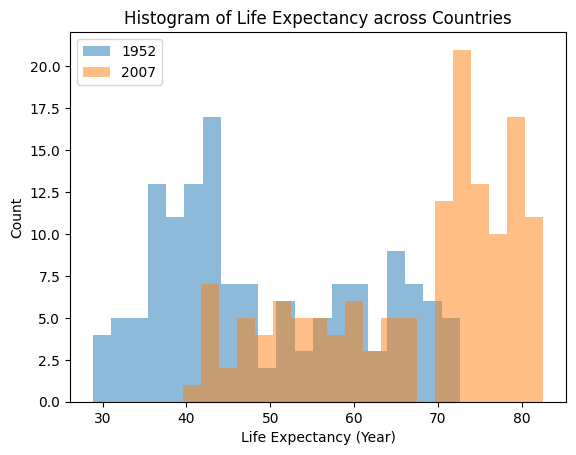

In [58]:
# two histogram on the same plot (an ax object)
fig, ax = plt.subplots()

# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html
ax.hist(gm_1952["lifeExp"], bins=20, alpha=0.5, label=1952)
ax.hist(gm_2007["lifeExp"], bins=20, alpha=0.5, label=2007)

ax.set_ylabel("Count")
ax.set_xlabel("Life Expectancy (Year)")
ax.set_title("Histogram of Life Expectancy across Countries")

ax.legend(loc='upper left')

# optional in notebook
plt.show()

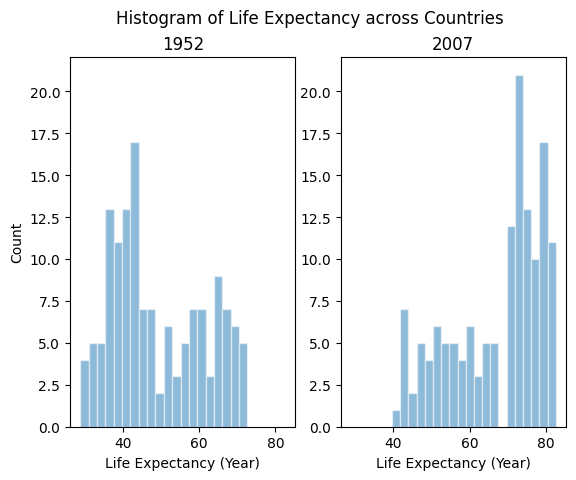

In [61]:
# two histograms on two sub-plots (two ax objects)
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)

# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html
ax[0].hist(gm_1952["lifeExp"], bins=20, edgecolor="white", alpha=0.5)
ax[1].hist(gm_2007["lifeExp"], bins=20, edgecolor="white", alpha=0.5)

# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html#matplotlib.axes.Axes.tick_params
ax[1].yaxis.set_tick_params(labelleft=True)

ax[0].set_ylabel("Count")

ax[0].set_xlabel("Life Expectancy (Year)")
ax[1].set_xlabel("Life Expectancy (Year)")

ax[0].set_title("1952")
ax[1].set_title("2007")

fig.suptitle("Histogram of Life Expectancy across Countries")

# optional in notebook
plt.show()

### Seaborn

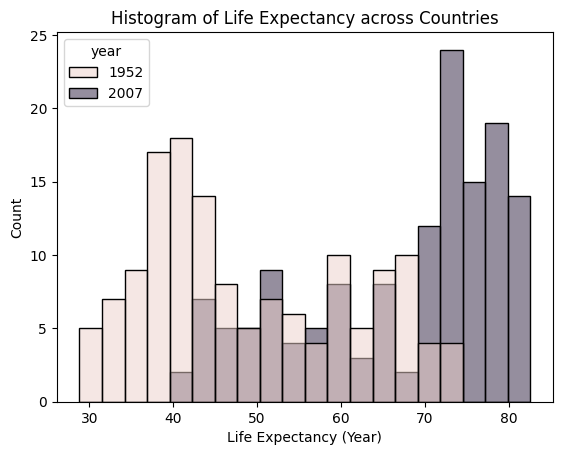

In [62]:
# prepare data for seanborn histogram plot
gm_1952_2007 = gapminder[(gapminder["year"].isin([1952, 2007]))]

# two histogram on the same plot (an ax object)
ax = sns.histplot(data=gm_1952_2007, x="lifeExp", hue="year", bins=20, multiple="layer")

ax.set_ylabel("Count")
ax.set_xlabel("Life Expectancy (Year)")
ax.set_title("Histogram of Life Expectancy across Countries")

# optional in notebook
plt.show()

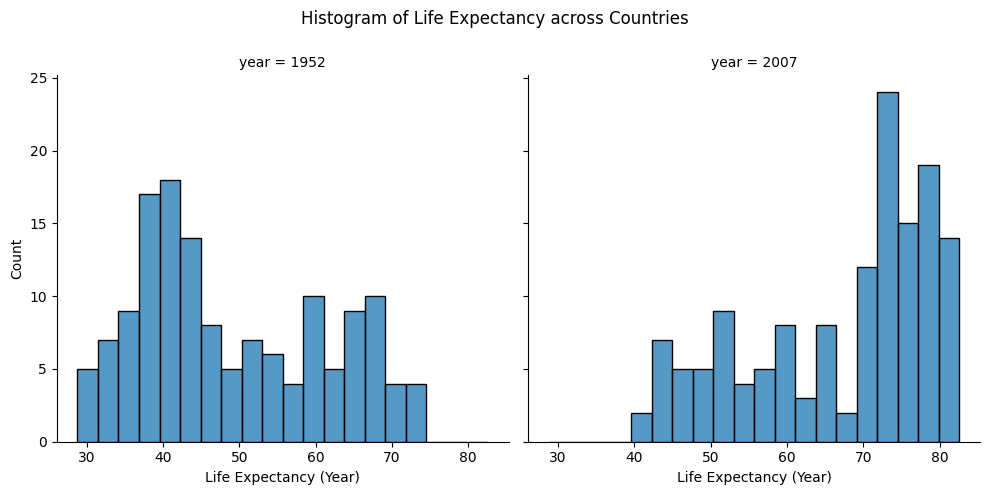

In [63]:
# two histogram on two sub-plots (two ax objects)

# prepare data for seanborn histogram plot
gm_1952_2007 = gapminder[(gapminder["year"].isin([1952, 2007]))]

# two histogram on the same plot (an ax object)
# note the col argument
ax = sns.displot(data=gm_1952_2007, x="lifeExp", col="year", bins=20)

# https://seaborn.pydata.org/generated/seaborn.FacetGrid.set_xlabels.html
ax.set_xlabels("Life Expectancy (Year)")

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html
ax.fig.subplots_adjust(top=0.85)
ax.fig.suptitle("Histogram of Life Expectancy across Countries")

# optional in notebook
plt.show()

### Exercise

Create a histogram for life expectancy across countries in 2007. Plot the probability density (instead of the count), and a density curve too.

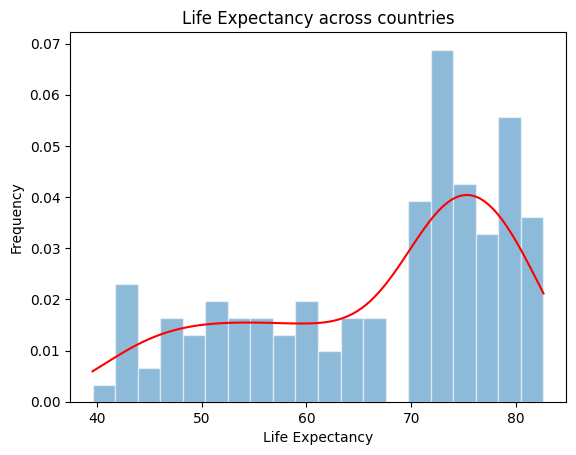

In [71]:
# using matplotlib

from scipy.stats import gaussian_kde
import numpy as np

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
density = gaussian_kde(gm_2007["lifeExp"])
xs = np.linspace(gm_2007["lifeExp"].min(), gm_2007["lifeExp"].max(), 100)
ys = density(xs)

fig, ax = plt.subplots()

# insert your code here

ax.hist(gm_2007["lifeExp"], bins=20, density=True, edgecolor="white",alpha=0.5)
ax.plot(xs,ys,color="red")

ax.set_xlabel("Life Expectancy")
ax.set_ylabel("Frequency")
ax.set_title("Life Expectancy across countries")
# optional in notebook
plt.show()

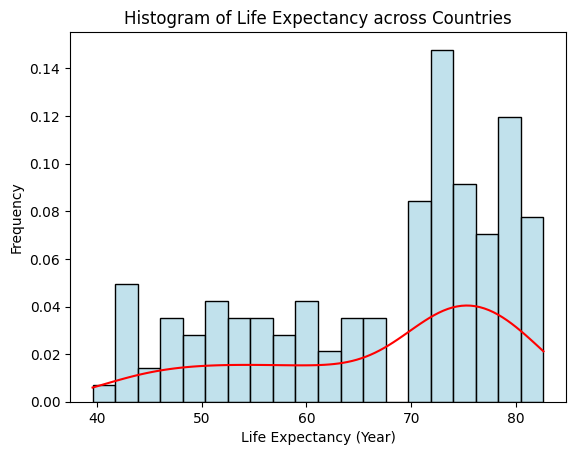

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np

# Correct input: pass whole DataFrame, not just Series
density = gaussian_kde(gm_2007["lifeExp"])
xs = np.linspace(gm_2007["lifeExp"].min(), gm_2007["lifeExp"].max(), 100)
ys = density(xs)

fig, ax = plt.subplots()

# Correct histogram call
sns.histplot(data=gm_2007, stat="probability", x="lifeExp", bins=20, color="lightblue", edgecolor="black", ax=ax)

sns.lineplot(x=xs, y=ys, color="red", ax=ax)

ax.set_ylabel("Frequency")
ax.set_xlabel("Life Expectancy (Year)")
ax.set_title("Histogram of Life Expectancy across Countries")
plt.show()


## 3.5 Scatter plot

Produce a scatter plot of life expectancy against GDP per capita in 2007.

### Matplotlib

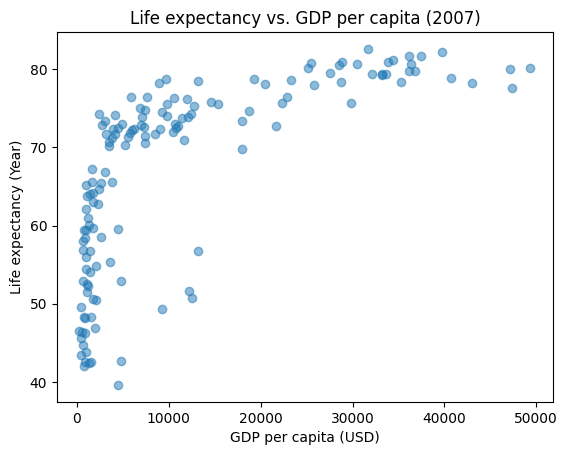

In [80]:
fig, ax = plt.subplots()

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
ax.scatter(gm_2007["gdpPercap"], gm_2007["lifeExp"], alpha=0.5)

ax.set_ylabel("Life expectancy (Year)")
ax.set_xlabel("GDP per capita (USD)")
ax.set_title("Life expectancy vs. GDP per capita (2007)")

# optional in notebook
plt.show()

### Seanborn

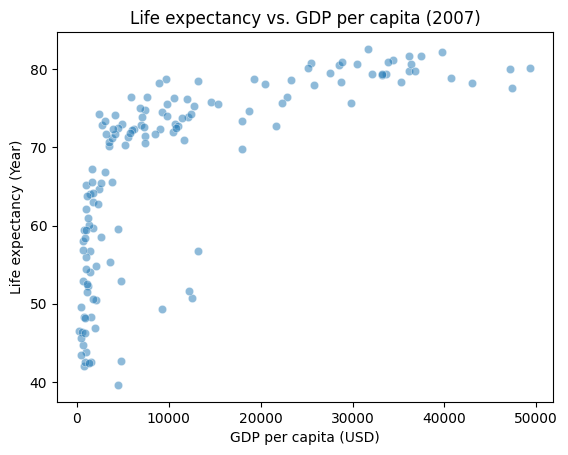

In [81]:
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
ax = sns.scatterplot(data=gm_2007, x="gdpPercap", y="lifeExp", alpha=0.5)

ax.set_ylabel("Life expectancy (Year)")
ax.set_xlabel("GDP per capita (USD)")
ax.set_title("Life expectancy vs. GDP per capita (2007)")

# optional in notebook
plt.show()

### Exercise

Produce two scatter sub-plots of life expectancy against GDP per capita in 1952 and 2007.

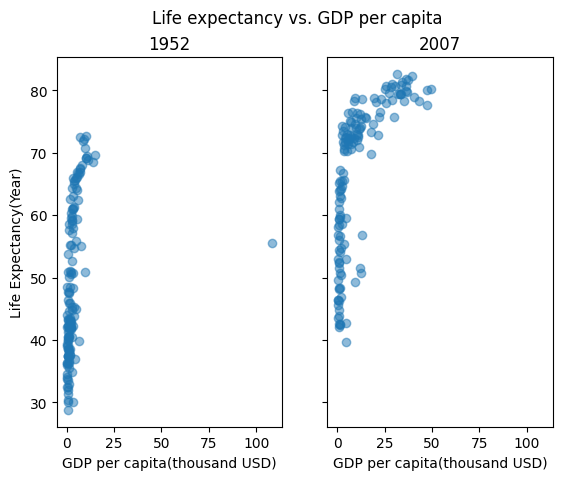

In [87]:
# Your code here

fig,ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)

ax[0].scatter(gm_1952["gdpPercap"]/1000, gm_1952["lifeExp"], alpha=0.5)
ax[1].scatter(gm_2007["gdpPercap"]/1000, gm_2007["lifeExp"], alpha=0.5)

ax[0].set_ylabel("Life Expectancy(Year)")
ax[0].set_xlabel("GDP per capita(thousand USD)")
ax[1].set_xlabel("GDP per capita(thousand USD)")

ax[0].set_title("1952")
ax[1].set_title("2007")

fig.suptitle("Life expectancy vs. GDP per capita")

plt.show()

# 4 Bubble plot

It isn't trivial to create a good-looking bubble plot using Matplotlib. Getting the size of the bubble and the legend right takes some effort. Below we first produce a bubble plot with almost no customization. We then refine it to make it look better.

We won't attempt to customize the bubble plot created using Seaborn.

## Matplotlib

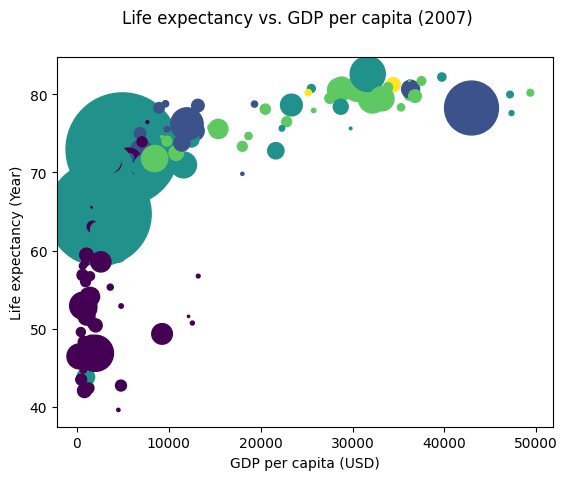

In [88]:
# Matplotlib bubble plot with no refinement

fig, ax = plt.subplots()

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
scatter = ax.scatter(
    x = gm_2007["gdpPercap"],
    y = gm_2007["lifeExp"],
    s = gm_2007["pop"]/200000,
    c = gm_2007["continent"].astype("category").cat.codes,
)

ax.set_ylabel("Life expectancy (Year)")
ax.set_xlabel("GDP per capita (USD)")
ax.figure.suptitle("Life expectancy vs. GDP per capita (2007)")

# optional in notebook
plt.show()

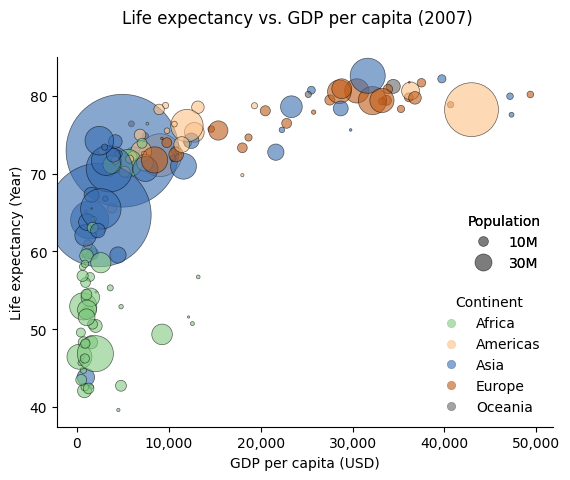

In [89]:
# Matplotlib bubble plot with refinement

from matplotlib import ticker

fig, ax = plt.subplots()

# set the factor to adjust the size of the bubble
size_factor = 200_000

# obtain continent category code mapping (for legend label later)
continent_code_dict = dict(zip(gm_2007['continent'].astype("category").cat.codes, gm_2007['continent']))
continent_list_ordered = [v for k,v in dict(sorted(continent_code_dict.items())).items()]

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
scatter = ax.scatter(
    x = gm_2007["gdpPercap"],
    y = gm_2007["lifeExp"],
    s = gm_2007["pop"]/size_factor,
    c = gm_2007["continent"].astype("category").cat.codes,
    cmap = "Accent",
    alpha = 0.6,
    edgecolors = "black",
    linewidths = 0.5
)

ax.set_ylabel("Life expectancy (Year)")
ax.set_xlabel("GDP per capita (USD)")
ax.figure.suptitle("Life expectancy vs. GDP per capita (2007)")

# https://matplotlib.org/stable/api/spines_api.html
ax.spines[["top", "right"]].set_visible(False)

# set y axis top limit to 85 so one top bubble doesn't miss a part
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylim.html
ax.set_ylim(bottom=None, top=85)

# format the x-axis major ticker label
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# handle legend
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html
handles1, labels1 = scatter.legend_elements(prop="colors")
labels1 = continent_list_ordered
legend1 = ax.legend(handles1, labels1, loc="lower right", title="Continent", framealpha=0)
ax.add_artist(legend1)

handles2, labels2 = scatter.legend_elements(prop="sizes",
                                            num=[10_000_000, 30_000_000],
                                            # fmt="{x:,.0e}",
                                            func = lambda x: x*size_factor,
                                            alpha=0.3)
# manually set the label instead of using the default formatter or fmt argument
labels2 = ["10M", "30M"]
legend2 = ax.legend(handles2, labels2, loc="center right", title="Population", framealpha=0)
ax.add_artist(legend2)

# optional in notebook
plt.show()

## Seaborn

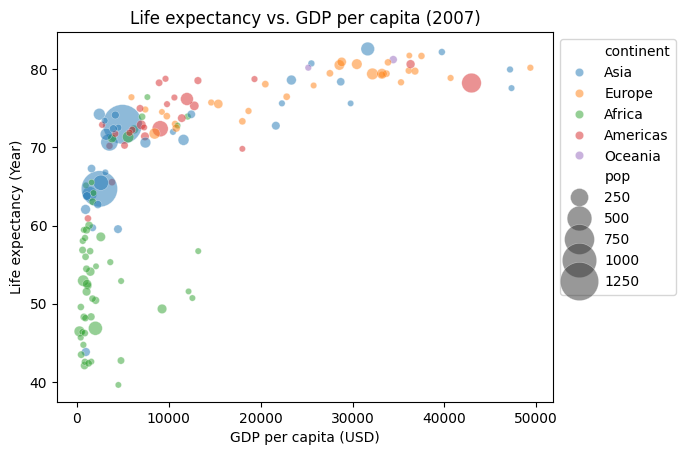

In [93]:
# use the default seaborn plot
# still need refinement, but leave it as it is for now
gm_2007_new = gm_2007.copy()
gm_2007_new["pop"] = gm_2007_new["pop"] / 1_000_000

# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
ax = sns.scatterplot(
    data=gm_2007_new,
    x="gdpPercap",
    y="lifeExp",
    size="pop",
    hue="continent",
    alpha=0.5,
    sizes=(20, 800)
)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax.set_ylabel("Life expectancy (Year)")
ax.set_xlabel("GDP per capita (USD)")
ax.set_title("Life expectancy vs. GDP per capita (2007)")

# optional in notebook
plt.show()